In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
df_f=pd.read_csv(r"C:\Users\Krithika\OneDrive\Desktop\project\Project_3\features.csv")
df_f

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05-02-2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12-02-2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19-02-2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26-02-2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05-03-2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28-06-2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05-07-2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12-07-2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19-07-2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [3]:
df_f.shape

(8190, 12)

In [4]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [5]:
df_f.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [6]:
df_f.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [7]:
categorical_columns = df_f.select_dtypes(include=['object']).columns
continuous_columns =df_f.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", categorical_columns)
print("Continuous Columns:", continuous_columns)

Categorical Columns: Index(['Date'], dtype='object')
Continuous Columns: Index(['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')


In [8]:
df_f = df_f.dropna(subset=['Date'])

df_f['Date'] = pd.to_datetime(df_f['Date'], errors='coerce')

df_f = df_f.sort_values('Date')



# Step 2: Extract Day, Week, Month, and Year
df_f['Day'] = df_f['Date'].dt.day
df_f['Week'] = df_f['Date'].dt.isocalendar().week
df_f['Month'] = df_f['Date'].dt.month
df_f['Year'] = df_f['Date'].dt.year

# Optional: Display updated dataframe
print(df_f[['Date', 'Day', 'Week', 'Month', 'Year']].head(10))


           Date   Day  Week  Month    Year
1672 2010-01-10  10.0     1    1.0  2010.0
5312 2010-01-10  10.0     1    1.0  2010.0
2582 2010-01-10  10.0     1    1.0  2010.0
7496 2010-01-10  10.0     1    1.0  2010.0
3128 2010-01-10  10.0     1    1.0  2010.0
3310 2010-01-10  10.0     1    1.0  2010.0
216  2010-01-10  10.0     1    1.0  2010.0
1308 2010-01-10  10.0     1    1.0  2010.0
2218 2010-01-10  10.0     1    1.0  2010.0
3856 2010-01-10  10.0     1    1.0  2010.0


In [9]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8190 entries, 1672 to 8189
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          3285 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
 12  Day           3285 non-null   float64       
 13  Week          3285 non-null   UInt32        
 14  Month         3285 non-null   float64       
 15  Year          3285 non-null   float64   

In [10]:
df_f['MarkDown1']=df_f['MarkDown1'].replace(np.nan,"0")
df_f['MarkDown1'].isnull().sum()

0

In [11]:
df_f.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Week,Month,Year
1672,10,2010-01-10,86.01,3.001,0,NaN,NaN,NaN,NaN,126.234600,9.003,False,10.0,1,1.0,2010.0
5312,30,2010-01-10,70.28,2.603,0,NaN,NaN,NaN,NaN,211.329874,8.163,False,10.0,1,1.0,2010.0
2582,15,2010-01-10,59.69,2.840,0,NaN,NaN,NaN,NaN,132.756800,8.067,False,10.0,1,1.0,2010.0
7496,42,2010-01-10,86.01,3.001,0,NaN,NaN,NaN,NaN,126.234600,9.003,False,10.0,1,1.0,2010.0
3128,18,2010-01-10,67.76,2.717,0,NaN,NaN,NaN,NaN,132.756800,9.331,False,10.0,1,1.0,2010.0
3310,19,2010-01-10,59.91,2.840,0,NaN,NaN,NaN,NaN,132.756800,8.067,False,10.0,1,1.0,2010.0
216,2,2010-01-10,69.24,2.603,0,NaN,NaN,NaN,NaN,211.329874,8.163,False,10.0,1,1.0,2010.0
1308,8,2010-01-10,68.70,2.603,0,NaN,NaN,NaN,NaN,215.031003,6.433,False,10.0,1,1.0,2010.0
2218,13,2010-01-10,68.74,2.853,0,NaN,NaN,NaN,NaN,126.234600,7.795,False,10.0,1,1.0,2010.0
3856,22,2010-01-10,69.31,2.717,0,NaN,NaN,NaN,NaN,136.629757,8.572,False,10.0,1,1.0,2010.0


In [12]:
df_f['MarkDown2']=df_f['MarkDown2'].replace(np.nan,"0")
df_f['MarkDown2'].isnull().sum()

0

In [13]:
df_f['MarkDown3']=df_f['MarkDown3'].replace(np.nan,"0")
df_f['MarkDown3'].isnull().sum()

0

In [14]:
df_f['MarkDown4']=df_f['MarkDown4'].replace(np.nan,"0")
df_f['MarkDown4'].isnull().sum()

0

In [15]:
df_f['MarkDown5']=df_f['MarkDown5'].replace(np.nan,"0")
df_f['MarkDown5'].isnull().sum()

0

In [16]:
df_f.head(110)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Week,Month,Year
1672,10,2010-01-10,86.01,3.001,0,0,0,0,0,126.234600,9.003,False,10.0,1,1.0,2010.0
5312,30,2010-01-10,70.28,2.603,0,0,0,0,0,211.329874,8.163,False,10.0,1,1.0,2010.0
2582,15,2010-01-10,59.69,2.840,0,0,0,0,0,132.756800,8.067,False,10.0,1,1.0,2010.0
7496,42,2010-01-10,86.01,3.001,0,0,0,0,0,126.234600,9.003,False,10.0,1,1.0,2010.0
3128,18,2010-01-10,67.76,2.717,0,0,0,0,0,132.756800,9.331,False,10.0,1,1.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205,13,2010-02-07,78.82,2.814,0,0,0,0,0,126.139200,7.951,False,7.0,5,2.0,2010.0
385,3,2010-02-07,82.20,2.669,0,0,0,0,0,214.546322,7.346,False,7.0,5,2.0,2010.0
7301,41,2010-02-07,69.39,2.728,0,0,0,0,0,189.488260,7.335,False,7.0,5,2.0,2010.0
5117,29,2010-02-07,72.88,2.815,0,0,0,0,0,132.521867,10.409,False,7.0,5,2.0,2010.0


In [17]:
df_f.isnull().sum()

Store              0
Date            4905
Temperature        0
Fuel_Price         0
MarkDown1          0
MarkDown2          0
MarkDown3          0
MarkDown4          0
MarkDown5          0
CPI              585
Unemployment     585
IsHoliday          0
Day             4905
Week            4905
Month           4905
Year            4905
dtype: int64

In [18]:
df_f[['CPI', 'Unemployment']] = df_f[['CPI', 'Unemployment']].ffill()
df_f[['CPI', 'Unemployment']].isnull().sum()

CPI             0
Unemployment    0
dtype: int64

In [19]:
df_f.isnull().sum()

Store              0
Date            4905
Temperature        0
Fuel_Price         0
MarkDown1          0
MarkDown2          0
MarkDown3          0
MarkDown4          0
MarkDown5          0
CPI                0
Unemployment       0
IsHoliday          0
Day             4905
Week            4905
Month           4905
Year            4905
dtype: int64

In [20]:
df_f.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1               object
MarkDown2               object
MarkDown3               object
MarkDown4               object
MarkDown5               object
CPI                    float64
Unemployment           float64
IsHoliday                 bool
Day                    float64
Week                    UInt32
Month                  float64
Year                   float64
dtype: object

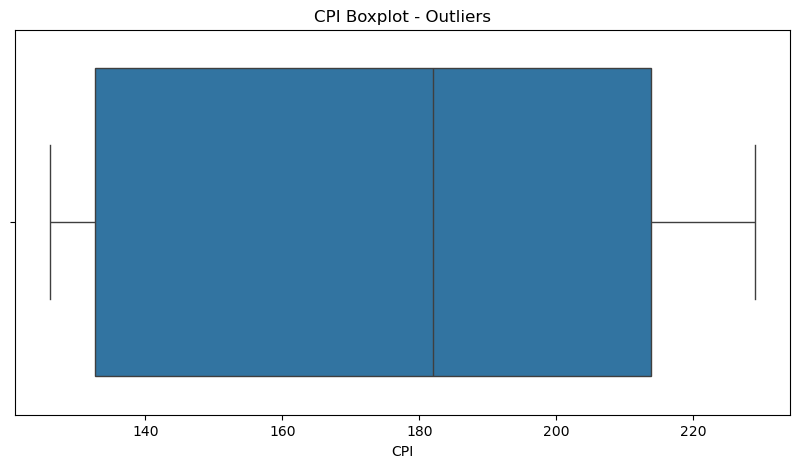

In [21]:
# Step 9: EDA - Outlier Detection (Visual)
plt.figure(figsize=(10,5))
sns.boxplot(x=df_f['CPI'])
plt.title('CPI Boxplot - Outliers')
plt.show()

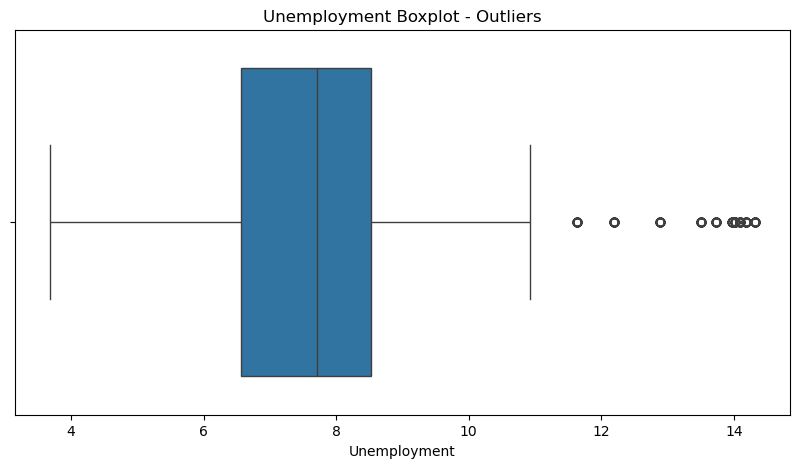

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_f['Unemployment'])
plt.title('Unemployment Boxplot - Outliers')
plt.show()

In [23]:
df_train=pd.read_csv(r"C:\Users\Krithika\OneDrive\Desktop\project\Project_3\train.csv")
df_train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [24]:
df_store=pd.read_csv(r"C:\Users\Krithika\OneDrive\Desktop\project\Project_3\stores.csv")
df_store.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [25]:
train_df = pd.merge(df_train,df_store,on='Store',how='left')

In [26]:
train_df.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315
5,1,1,2010-03-12,21043.39,False,A,151315
6,1,1,2010-03-19,22136.64,False,A,151315
7,1,1,2010-03-26,26229.21,False,A,151315
8,1,1,2010-04-02,57258.43,False,A,151315
9,1,1,2010-04-09,42960.91,False,A,151315


In [27]:
print(df_f.columns)
print(df_train.columns)
print(df_store.columns)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Day', 'Week', 'Month', 'Year'],
      dtype='object')
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')
Index(['Store', 'Type', 'Size'], dtype='object')


In [28]:
# Convert store columns to string to ensure consistency
df_f['Store'] = df_f['Store'].astype(str)
df_train['Store'] = df_train['Store'].astype(str)
df_store['Store'] = df_store['Store'].astype(str)

# Strip any leading/trailing spaces in the store columns
df_f['Store'] = df_f['Store'].str.strip()
df_train['Store'] = df_train['Store'].str.strip()
df_store['Store'] = df_store['Store'].str.strip()

In [29]:
# Ensure both Date columns are in datetime format
df_f['Date'] = pd.to_datetime(df_f['Date'])
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Now safely merge
merged_df = pd.merge(df_f, df_train, on=['Store', 'Date'], how='inner')

# Merge with store details
final_merged_df = pd.merge(merged_df, df_store, on='Store', how='inner')

print(df_f.dtypes)
print(df_train.dtypes)

Store                   object
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1               object
MarkDown2               object
MarkDown3               object
MarkDown4               object
MarkDown5               object
CPI                    float64
Unemployment           float64
IsHoliday                 bool
Day                    float64
Week                    UInt32
Month                  float64
Year                   float64
dtype: object
Store                   object
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object


In [50]:
final_merged_df.to_csv("final_merged_df.csv", index=False)

In [51]:
final_merged_df.to_csv(r"C:\Users\Krithika\OneDrive\Desktop\project\Project_3\final_merged_df.csv", index=False)

In [30]:
final_merged_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,IsHoliday_x,Day,Week,Month,Year,Dept,Weekly_Sales,IsHoliday_y,Type,Size
0,20,2010-03-12,35.47,3.046,0,0,0,0,0,204.824919,...,False,12.0,10,3.0,2010.0,1,47291.77,False,A,203742
1,20,2010-03-12,35.47,3.046,0,0,0,0,0,204.824919,...,False,12.0,10,3.0,2010.0,2,73364.65,False,A,203742
2,20,2010-03-12,35.47,3.046,0,0,0,0,0,204.824919,...,False,12.0,10,3.0,2010.0,3,13564.68,False,A,203742
3,20,2010-03-12,35.47,3.046,0,0,0,0,0,204.824919,...,False,12.0,10,3.0,2010.0,4,44707.58,False,A,203742
4,20,2010-03-12,35.47,3.046,0,0,0,0,0,204.824919,...,False,12.0,10,3.0,2010.0,5,49321.76,False,A,203742


In [31]:
final_merged_df['Date'] = pd.to_datetime(final_merged_df['Date'],errors='coerce')
final_merged_df.sort_values(by=['Date'],inplace=True)
final_merged_df.set_index(final_merged_df.Date, inplace=True)
final_merged_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,IsHoliday_x,Day,Week,Month,Year,Dept,Weekly_Sales,IsHoliday_y,Type,Size
Date,,,,,,,,,,,,,,,,,,,,,
2010-03-12,20,2010-03-12,35.47,3.046,0,0,0,0,0,204.824919,...,False,12.0,10,3.0,2010.0,1,47291.77,False,A,203742
2010-03-12,35,2010-03-12,41.81,3.046,0,0,0,0,0,136.607571,...,False,12.0,10,3.0,2010.0,25,19075.50,False,B,103681
2010-03-12,35,2010-03-12,41.81,3.046,0,0,0,0,0,136.607571,...,False,12.0,10,3.0,2010.0,26,15841.28,False,B,103681
2010-03-12,35,2010-03-12,41.81,3.046,0,0,0,0,0,136.607571,...,False,12.0,10,3.0,2010.0,27,2004.50,False,B,103681
2010-03-12,35,2010-03-12,41.81,3.046,0,0,0,0,0,136.607571,...,False,12.0,10,3.0,2010.0,28,1159.14,False,B,103681


In [32]:
#checking whether the column IsHoliday_x and IsHoliday_y are same or not
# Check if IsHoliday_x and IsHoliday_y are identical
final_merged_df['IsHoliday_x'].equals(final_merged_df['IsHoliday_y'])

True

In [33]:
#Since these two columns are same so drop any one column and make another column as IsHoliday
# Drop the duplicate column and rename the other properly
final_merged_df.drop(columns='IsHoliday_x', inplace=True)
final_merged_df.rename(columns={'IsHoliday_y': 'IsHoliday'}, inplace=True)
final_merged_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29570 entries, 2010-03-12 to 2012-06-01
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         29570 non-null  object        
 1   Date          29570 non-null  datetime64[ns]
 2   Temperature   29570 non-null  float64       
 3   Fuel_Price    29570 non-null  float64       
 4   MarkDown1     29570 non-null  object        
 5   MarkDown2     29570 non-null  object        
 6   MarkDown3     29570 non-null  object        
 7   MarkDown4     29570 non-null  object        
 8   MarkDown5     29570 non-null  object        
 9   CPI           29570 non-null  float64       
 10  Unemployment  29570 non-null  float64       
 11  Day           29570 non-null  float64       
 12  Week          29570 non-null  UInt32        
 13  Month         29570 non-null  float64       
 14  Year          29570 non-null  float64       
 15  Dept          29570